In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

sns.set(rc={'figure.figsize':(11.7,8.27)})
colors = sns.color_palette("colorblind")
import networkx as nx

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.style.use('ggplot')
#plt.style.use('seaborn-ticks')
#plt.style.use('seaborn-notebook')
#plt.rcParams['lines.linewidth']=3
#plt.rcParams['xtick.labelsize']=12
#plt.rcParams['ytick.labelsize']=12
#plt.rcParams['axes.labelsize']=14


# Input: A graph 
# Output: find degrees and plot their distribution
def Degree_Distribution(G):
    degree = G.degree()
    degree = [ deg for (v,deg) in degree ]
    print('Average Degree:',np.round(np.array(degree).mean(),5))
    plot_distribution(degree, xlabel='Degree ($k$)', 
                  ylabel='Number of nodes with degree $k$ ($N_k$)', title='Degree distributions')
    
    
def plot_distribution (data, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False) :
    counts = {}
    for item in data :
        if item not in counts :
            counts [ item ] = 0
        counts [ item ] += 1
    counts = sorted ( counts.items () )
    fig = plt.figure ()
    ax = fig.add_subplot (111)
    ax.scatter ([ k for (k , v ) in counts ] , [ v for (k , v ) in counts ])
    if(len(counts)<20):  # for tiny graph
        showLine=True
    if showLine==True:
        ax.plot ([ k for (k , v ) in counts ] , [ v for (k , v ) in counts ])
    if xlog == True:
        ax.set_xscale ( 'log')
    if ylog == True:
        ax.set_yscale ( 'log')
    if intAxis == True:
        gca = fig.gca()
        gca.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_xlabel ( xlabel)
    ax.set_ylabel ( ylabel )
    plt.title ( title )
    plt.show()
    #fig.savefig ( "degree_distribution.png" )
    
def plot_degree_bar (G) :
    degs = {}
    for n in G.nodes () :
        deg = G.degree ( n )
        if deg not in degs :
            degs [ deg ] = 0
        degs [ deg ] += 1
    items = sorted ( degs.items () )
    fig = plt.figure ()
    ax = fig.add_subplot (111)
    print(items)
    ax.bar([ k for (k , v ) in items ] , [ v for (k , v ) in items ])
    ax.set_xlabel ( 'Degree ($k$)')
    ax.set_ylabel ( 'Number of nodes with degree $k$ ($N_k$)')

def show_graph_with_labels(adjacency_matrix, mylabels, data, count):
    rows, cols = np.where(adjacency_matrix>0)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, with_labels=True, node_color="tab:cyan")
    plt.title(f'{data} ({count}) graph learnt from 30 epochs ')
    plt.show()

# Solar Dataset

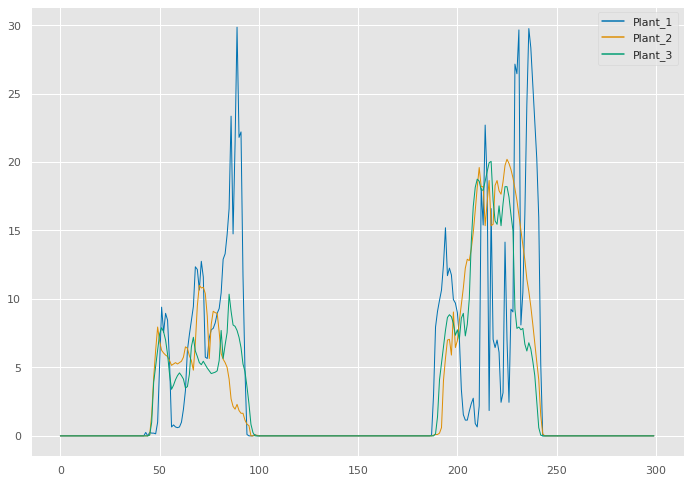

In [ ]:
solar = pd.read_csv('/content/drive/MyDrive/Indiana Coursework/DLS/DLS Project/DLS_project/datasets/solar.txt', header= None)
columns = ['Plant_'+str(i) for i in range(1,solar.shape[1]+1)]
solar.columns = columns
sns.lineplot(data=solar.iloc[0:300,0:3], dashes=False, palette=colors[0:3], linewidth=1)

Solar graph learnt has 137 nodes and 2692 edges


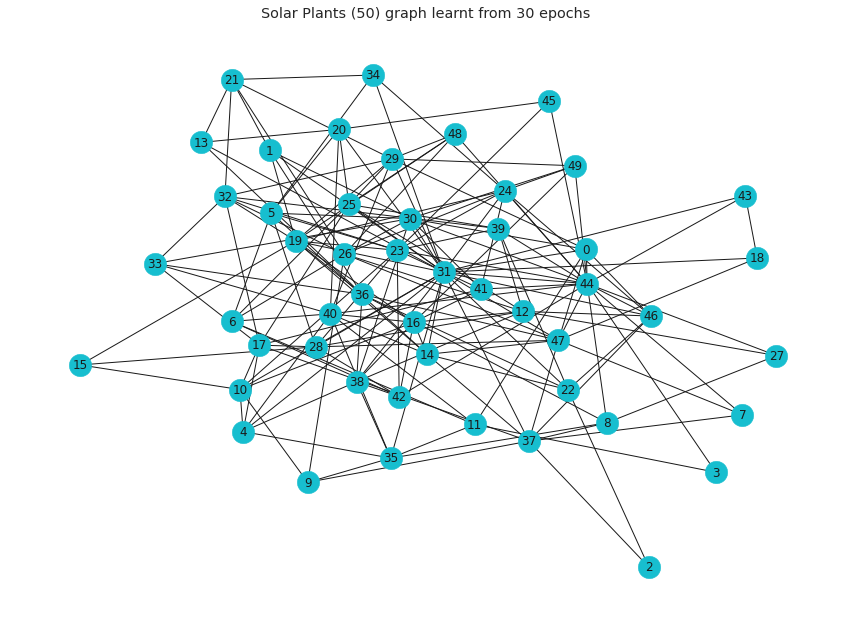

In [ ]:
path = '/content/drive/MyDrive/Indiana Coursework/DLS/DLS Project/DLS_project/solar_results/MTGNN/adjacency_matrix.npy'
adj = np.load(path)
gr=nx.from_numpy_matrix(adj)
print("Solar graph learnt has {} nodes and {} edges".format(gr.number_of_nodes(),gr.number_of_edges()))
show_graph_with_labels(adj[0:50,0:50], range(1,51), "Solar Plants", 50)

Average Degree: 39.29927


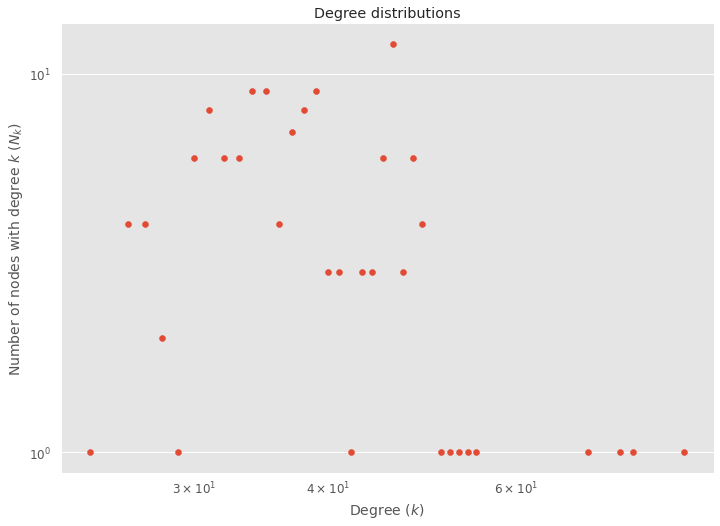

In [ ]:
Degree_Distribution(gr)

In [ ]:
actual_test_path = '/content/drive/MyDrive/Indiana Coursework/DLS/DLS Project/DLS_project/solar_results/MTGNN/actual_output.npy'
actual_test = np.load(actual_test_path)
                      
predicted_test_path = '/content/drive/MyDrive/Indiana Coursework/DLS/DLS Project/DLS_project/solar_results/MTGNN/predicted_output.npy'
predicted_test = np.load(predicted_test_path)

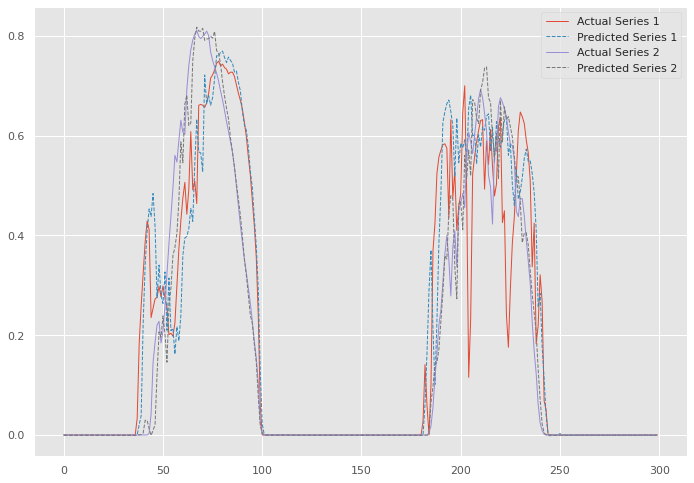

In [ ]:
sns.lineplot(data=actual_test[0:300,0], dashes=False, palette=colors[0], linewidth=1)
sns.lineplot(data=predicted_test[0:300,0], palette=colors[1], linewidth=1,linestyle='--')
sns.lineplot(data=actual_test[0:300,1], dashes=False, palette=colors[2], linewidth=1)
sns.lineplot(data=predicted_test[0:300,1], palette=colors[3], linewidth=1,linestyle='--')
plt.legend(labels=['Actual Series 1','Predicted Series 1','Actual Series 2', 'Predicted Series 2'])
plt.show()

# Traffic Dataset

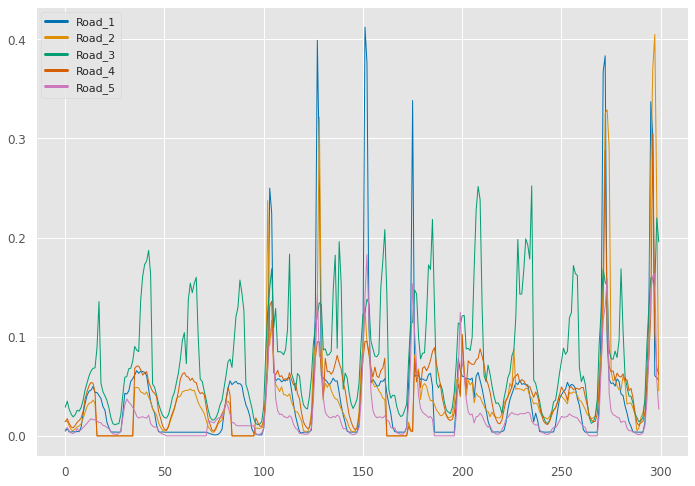

In [ ]:
traffic = pd.read_csv('/content/drive/MyDrive/Indiana Coursework/DLS/DLS Project/DLS_project/datasets/traffic.txt', header= None)
traffic.head()
columns = ['Road_'+str(i) for i in range(1,traffic.shape[1]+1)]
traffic.columns = columns
sns.lineplot(data=traffic.iloc[0:300,0:5], dashes=False,palette=colors[0:5],linewidth=1)

Traffic graph learnt has 862 nodes and 17236 edges


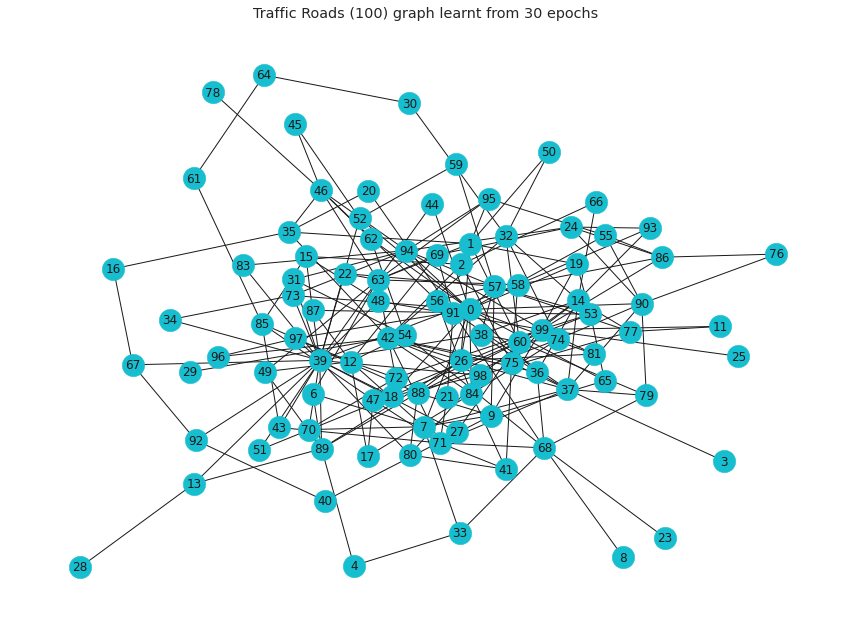

In [ ]:
path = '/content/drive/MyDrive/Indiana Coursework/DLS/DLS Project/DLS_project/traffic_results/MTGNN/adjacency_matrix.npy'
adj = np.load(path)
gr=nx.from_numpy_matrix(adj)
print("Traffic graph learnt has {} nodes and {} edges".format(gr.number_of_nodes(),gr.number_of_edges()))
show_graph_with_labels(adj[0:100,0:100], range(1,101), "Traffic Roads", 100)

Average Degree: 39.99072


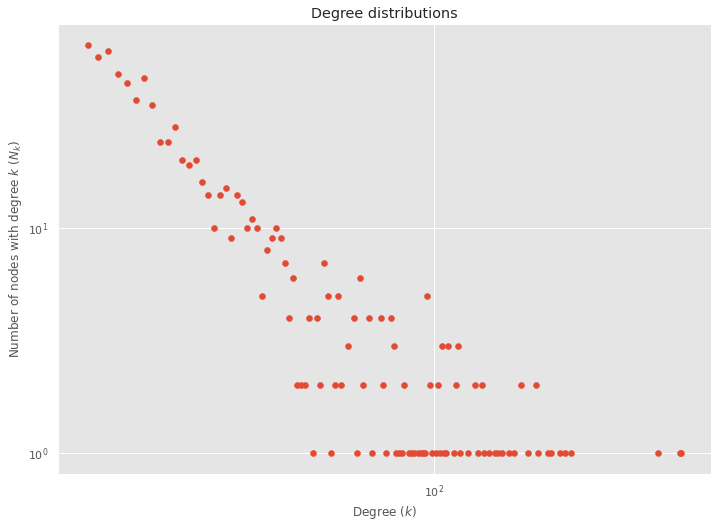

In [ ]:
Degree_Distribution(gr)

In [ ]:
actual_test_path = '/content/drive/MyDrive/Indiana Coursework/DLS/DLS Project/DLS_project/traffic_results/MTGNN/actual_output.npy'
actual_test = np.load(actual_test_path)
                      
predicted_test_path = '/content/drive/MyDrive/Indiana Coursework/DLS/DLS Project/DLS_project/traffic_results/MTGNN/predicted_output.npy'
predicted_test = np.load(predicted_test_path)

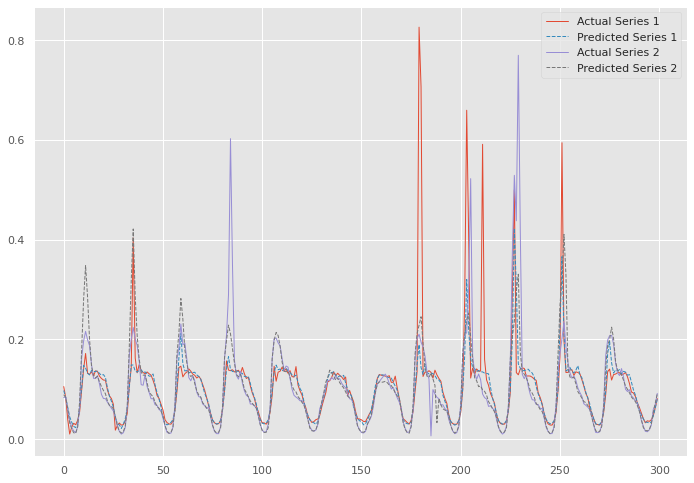

In [ ]:
sns.lineplot(data=actual_test[0:300,0], dashes=False, palette=colors[0], linewidth=1)
sns.lineplot(data=predicted_test[0:300,0], palette=colors[1], linewidth=1,linestyle='--')
sns.lineplot(data=actual_test[0:300,1], dashes=False, palette=colors[2], linewidth=1)
sns.lineplot(data=predicted_test[0:300,1], palette=colors[3], linewidth=1,linestyle='--')
plt.legend(labels=['Actual Series 1','Predicted Series 1','Actual Series 2', 'Predicted Series 2'])
plt.show()

# Paris Mobility

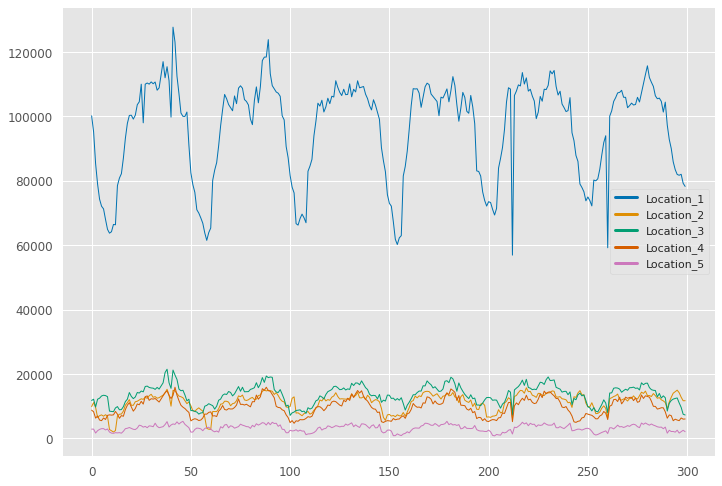

In [ ]:
electricity = pd.read_csv('/content/drive/MyDrive/Indiana Coursework/DLS/DLS Project/DLS_project/datasets/paris_mobility.txt', header= None)
electricity.head()
columns = ['Location_'+str(i) for i in range(1,electricity.shape[1]+1)]
electricity.columns = columns
sns.lineplot(data=electricity.iloc[0:300,0:5], dashes=False,palette=colors[0:5], linewidth = 1)

Paris Mobility graph learnt has 6 nodes and 15 edges


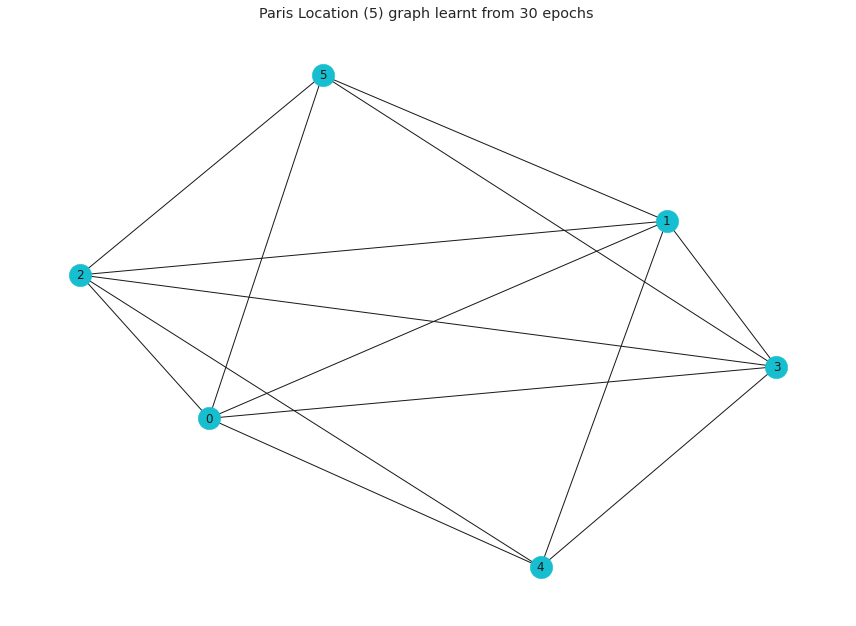

In [ ]:
path = '/content/drive/MyDrive/Indiana Coursework/DLS/DLS Project/DLS_project/paris_results/MTGNN/adjacency_matrix.npy'
adj = np.load(path)
gr=nx.from_numpy_matrix(adj)
print("Paris Mobility graph learnt has {} nodes and {} edges".format(gr.number_of_nodes(),gr.number_of_edges()))
show_graph_with_labels(adj, range(1,5), "Paris Location", 5)

In [ ]:
actual_test_path = '/content/drive/MyDrive/Indiana Coursework/DLS/DLS Project/DLS_project/paris_results/MTGNN/actual_output.npy'
actual_test = np.load(actual_test_path)
                      
predicted_test_path = '/content/drive/MyDrive/Indiana Coursework/DLS/DLS Project/DLS_project/paris_results/MTGNN/predicted_output.npy'
predicted_test = np.load(predicted_test_path)

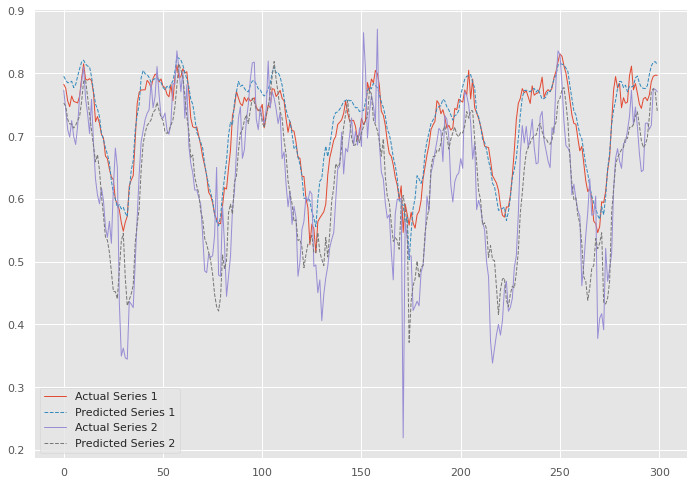

In [ ]:
sns.lineplot(data=actual_test[0:300,0], dashes=False, palette=colors[0], linewidth=1)
sns.lineplot(data=predicted_test[0:300,0], palette=colors[1], linewidth=1,linestyle='--')
sns.lineplot(data=actual_test[0:300,1], dashes=False, palette=colors[2], linewidth=1)
sns.lineplot(data=predicted_test[0:300,1], palette=colors[3], linewidth=1,linestyle='--')
plt.legend(labels=['Actual Series 1','Predicted Series 1','Actual Series 2', 'Predicted Series 2'])
plt.show()

# Energy Dataset

### Pending to get column names

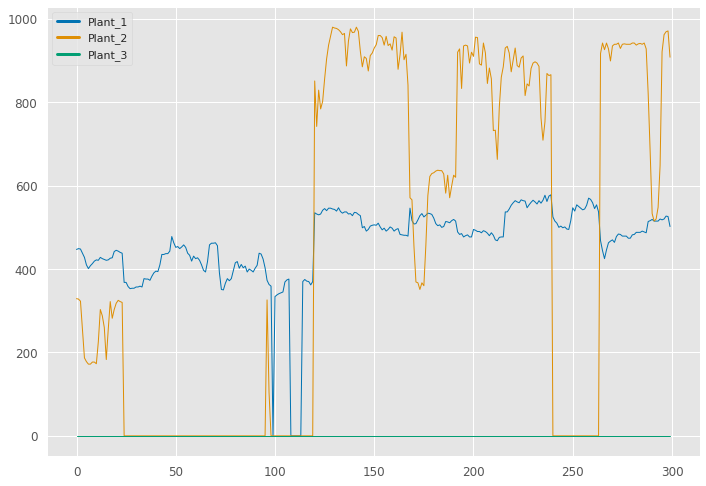

In [ ]:
energy = pd.read_csv('/content/drive/MyDrive/Indiana Coursework/DLS/DLS Project/DLS_project/datasets/energy_data.csv', header= None)
columns = ['Plant_'+str(i) for i in range(1,energy.shape[1]+1)]
energy.columns = columns
sns.lineplot(data=energy.iloc[0:300,0:3], dashes=False, palette=colors[0:3], linewidth=1)

Energy graph learnt has 28 nodes and 374 edges


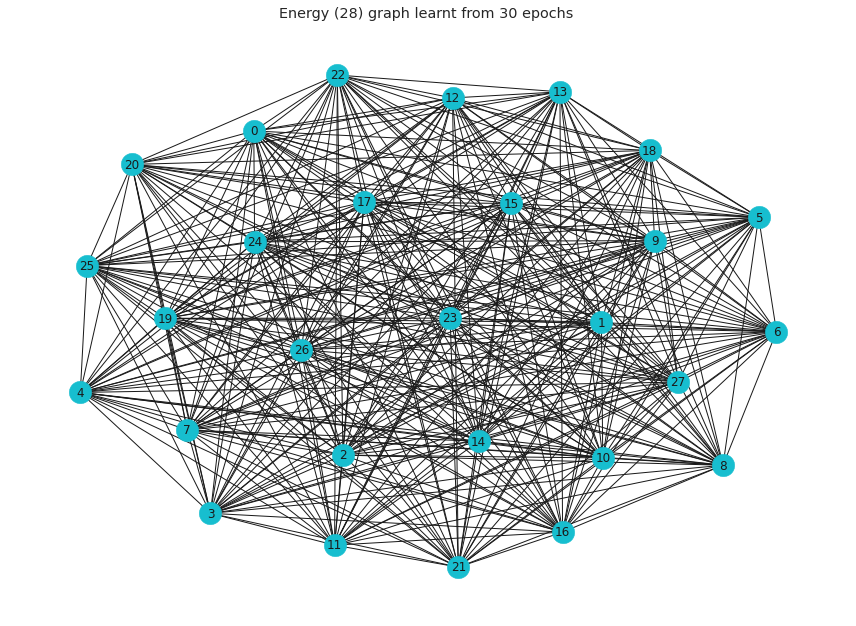

In [ ]:
path = '/content/drive/MyDrive/Indiana Coursework/DLS/DLS Project/DLS_project/energy_results/MTGNN/adjacency_matrix.npy'
adj = np.load(path)
gr=nx.from_numpy_matrix(adj)
print("Energy graph learnt has {} nodes and {} edges".format(gr.number_of_nodes(),gr.number_of_edges()))
show_graph_with_labels(adj,range(1,29), "Energy", 28)

Average Degree: 26.71429


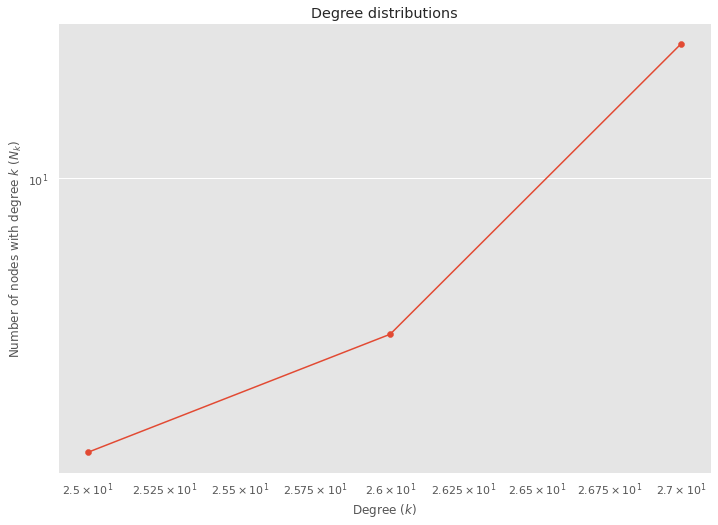

In [ ]:
Degree_Distribution(gr)

In [ ]:
actual_test_path = '/content/drive/MyDrive/Indiana Coursework/DLS/DLS Project/DLS_project/energy_results/MTGNN/actual_output.npy'
actual_test = np.load(actual_test_path)
                      
predicted_test_path = '/content/drive/MyDrive/Indiana Coursework/DLS/DLS Project/DLS_project/energy_results/MTGNN/predicted_output.npy'
predicted_test = np.load(predicted_test_path)

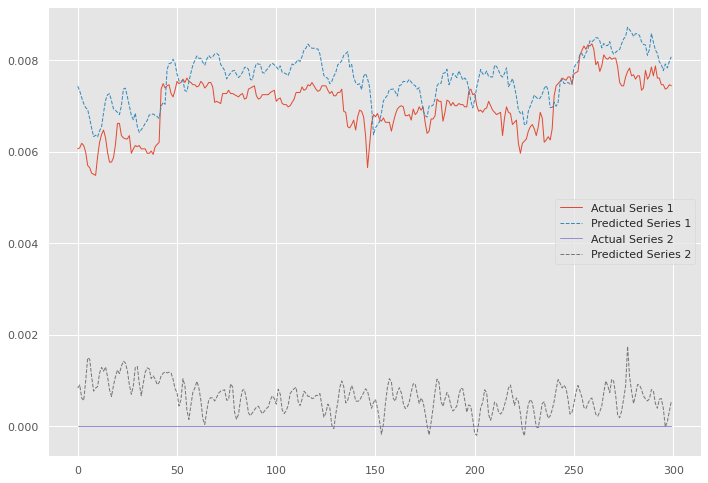

In [ ]:
sns.lineplot(data=actual_test[0:300,0], dashes=False, palette=colors[0], linewidth=1)
sns.lineplot(data=predicted_test[0:300,0], palette=colors[1], linewidth=1,linestyle='--')
sns.lineplot(data=actual_test[0:300,1], dashes=False, palette=colors[2], linewidth=1)
sns.lineplot(data=predicted_test[0:300,1], palette=colors[3], linewidth=1,linestyle='--')
plt.legend(labels=['Actual Series 1','Predicted Series 1','Actual Series 2', 'Predicted Series 2'])
plt.show()

# PEMS D7

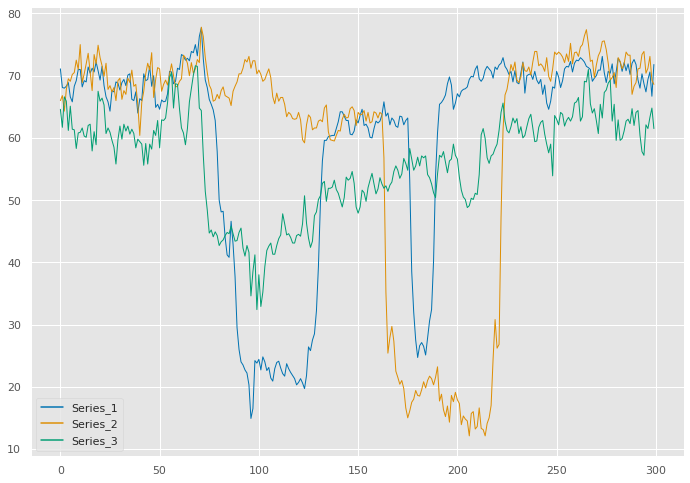

In [ ]:
pems = pd.read_csv('/content/drive/MyDrive/Indiana Coursework/DLS/DLS Project/DLS_project/datasets/pems_d7_data.csv', header= None)
columns = ['Series_'+str(i) for i in range(1,pems.shape[1]+1)]
pems.columns = columns
sns.lineplot(data=pems.iloc[0:300,0:3], dashes=False, palette=colors[0:3], linewidth=1)

PEMS graph learnt has 228 nodes and 4560 edges


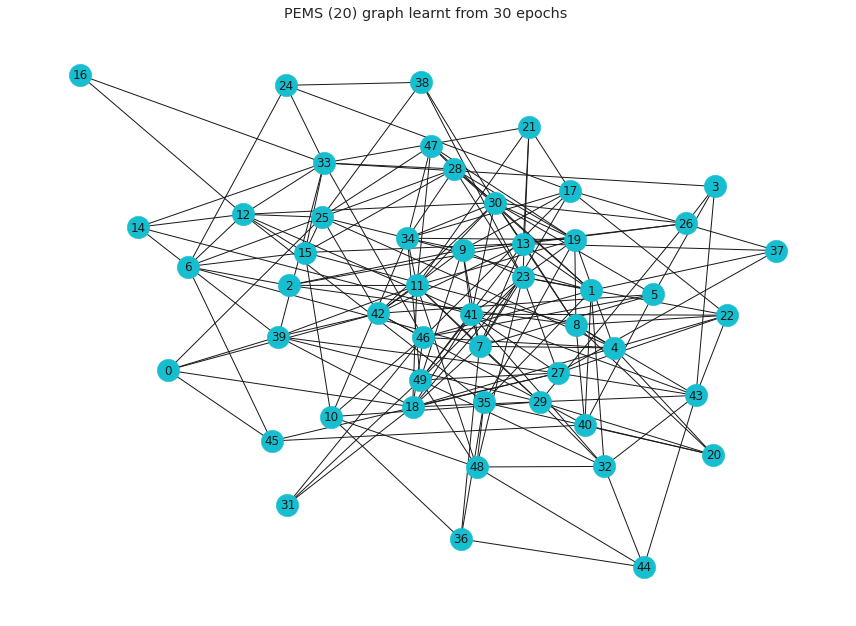

In [ ]:
path = '/content/drive/MyDrive/Indiana Coursework/DLS/DLS Project/DLS_project/pems_d7_results/MTGNN/adjacency_matrix.npy'
adj = np.load(path)
gr=nx.from_numpy_matrix(adj)
print("PEMS graph learnt has {} nodes and {} edges".format(gr.number_of_nodes(),gr.number_of_edges()))
show_graph_with_labels(adj[0:50,0:50],range(1,21), "PEMS", 20)

Average Degree: 40.0


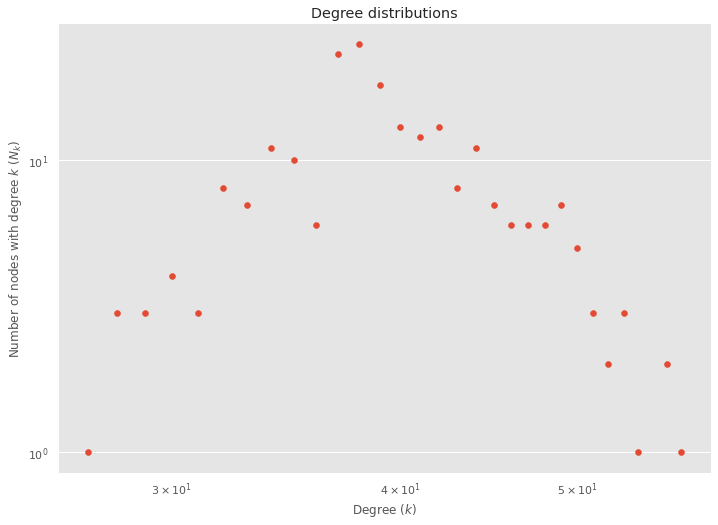

In [ ]:
Degree_Distribution(gr)

In [ ]:
actual_test_path = '/content/drive/MyDrive/Indiana Coursework/DLS/DLS Project/DLS_project/pems_d7_results/MTGNN/actual_output.npy'
actual_test = np.load(actual_test_path)
                      
predicted_test_path = '/content/drive/MyDrive/Indiana Coursework/DLS/DLS Project/DLS_project/pems_d7_results/MTGNN/predicted_output.npy'
predicted_test = np.load(predicted_test_path)

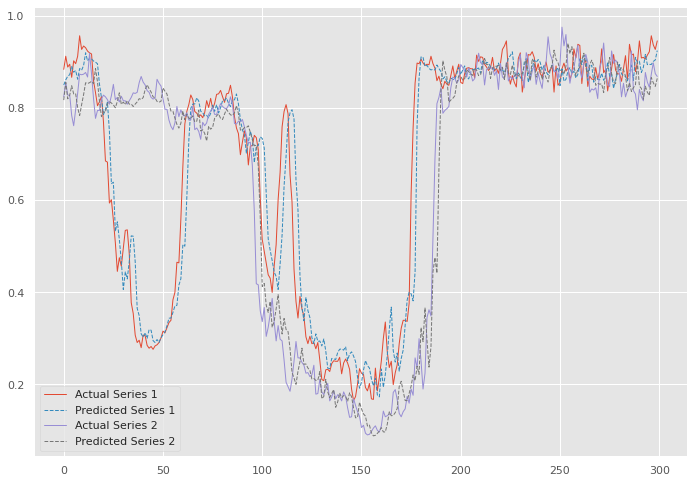

In [ ]:
sns.lineplot(data=actual_test[0:300,0], dashes=False, palette=colors[0], linewidth=1)
sns.lineplot(data=predicted_test[0:300,0], palette=colors[1], linewidth=1,linestyle='--')
sns.lineplot(data=actual_test[0:300,1], dashes=False, palette=colors[2], linewidth=1)
sns.lineplot(data=predicted_test[0:300,1], palette=colors[3], linewidth=1,linestyle='--')
plt.legend(labels=['Actual Series 1','Predicted Series 1','Actual Series 2', 'Predicted Series 2'])
plt.show()